In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Here, I will begin by importing any necessary libraries that I need. Anything that I will need later, I will simply add it to this portion. 


In [12]:
races = pd.read_csv('C:/Users/yoshi/OneDrive/Desktop/F1_Analytics/DataSets/races.csv')
results = pd.read_csv('C:/Users/yoshi/OneDrive/Desktop/F1_Analytics/DataSets/results.csv')
pit_stops = pd.read_csv('C:/Users/yoshi/OneDrive/Desktop/F1_Analytics/DataSets/pit_stops.csv')
lap_times = pd.read_csv('C:/Users/yoshi/OneDrive/Desktop/F1_Analytics/DataSets/lap_times.csv')
drivers = pd.read_csv('C:/Users/yoshi/OneDrive/Desktop/F1_Analytics/DataSets/drivers.csv')
constructors = pd.read_csv('C:/Users/yoshi/OneDrive/Desktop/F1_Analytics/DataSets/constructors.csv')

# Importing some of the important data we need. As of 6/26, I am missing circuits, driver standings, sprint, status, and qualifiers. 

In [15]:
# Merge results with races to get race details
race_results = results.merge(races, on='raceId')

# Merge with pit stops to get pit stop information
race_results = race_results.merge(pit_stops, on=['raceId', 'driverId'], how='left', suffixes=('', '_pitstop'))

# Merge with lap times to get lap time information
race_results = race_results.merge(lap_times, on=['raceId', 'driverId'], how='left', suffixes=('', '_lap'))

# Merge with drivers and constructors to get more detailed info
race_results = race_results.merge(drivers, on='driverId')
race_results = race_results.merge(constructors, on='constructorId')

# Ensure the 'milliseconds' column is numeric
race_results['milliseconds'] = pd.to_numeric(race_results['milliseconds'], errors='coerce')

# Feature engineering: Average lap time, number of pit stops, starting position
race_results['average_lap_time'] = race_results.groupby(['raceId', 'driverId'])['milliseconds'].transform('mean')
race_results['pit_stop_count'] = race_results.groupby(['raceId', 'driverId'])['stop'].transform('count')
race_results['starting_position'] = race_results['grid']




c:\Users\yoshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


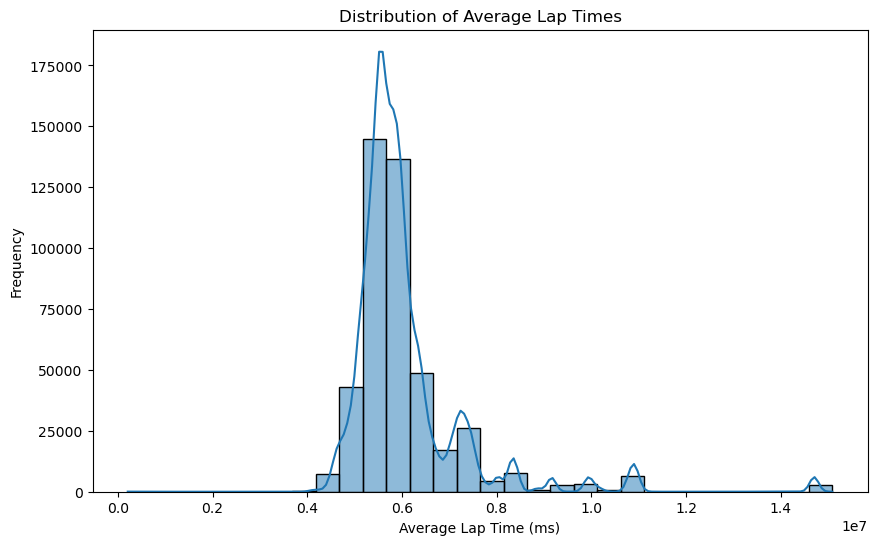

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(race_results['average_lap_time'], bins=30, kde=True)
plt.title('Distribution of Average Lap Times')
plt.xlabel('Average Lap Time (ms)')
plt.ylabel('Frequency')
plt.show()

# Searching the distribution of average lap times and plotting them to see how the average lap time is ditributed. 